In [40]:
#import
import pandas as pd
from geopy.geocoders import Nominatim
import plotly.express as px
import ipywidgets as widgets
from ipywidgets import fixed
from IPython.display import display

data = pd.read_csv('datasets/kc_house_data.csv')

In [15]:
# 1. Qual a quantidade de imóveis por nível?
# LOOP FOR
for i in range (len (data ) ):
    
if (data.loc[i, 'price'] > 0) & (data.loc[i, 'price'] < 321950 ):
    data.loc[i, 'nivel'] = 'nivel_0'  
    
    elif (data.loc[i, 'price'] >= 321950) & (data.loc[i, 'price'] < 450000):
        data.loc[i, 'nivel'] = 'nivel_1'
        
    elif (data.loc[i, 'price'] >= 450000) & (data.loc[i, 'price'] < 645000):
        data.loc[i, 'nivvel'] = 'nivel_2'
        
    else:
        data.loc[i, 'nivel'] = 'nivel_3'

IndentationError: expected an indented block (<ipython-input-15-8c5eb8429115>, line 4)

In [12]:
# 2. Adicione as seguintes informações ao imóvel:
    # O nome da rua
    # O número do imóvel
    # O nome do Bairro
    # O nome da Cidade
    # O nome do Estado

    # Onde tem essas informações? API chamada GEOPOY

In [41]:
# Initialize Nominatim API
geolocator = Nominatim( user_agent = 'geoapiExercises' )

response = geolocator.reverse( '47.5112, -122.257' )

print(response.raw['address']['road'])
print(response.raw['address']['house_number'])
print(response.raw['address']['neighbourhood'])
print(response.raw['address']['city'])
print(response.raw['address']['county'])
print(response.raw['address']['state'])

61st Avenue South
10012
Rainier Beach
Seattle
King County
Washington


In [3]:
#Create empty rows
data['road'] = 'NA'
data['house_number'] ='NA'
data['city'] = 'NA'
data['county'] = 'NA'
data['state'] = 'NA'

geolocator = Nominatim( user_agent = 'geoapiExercises' )

for i in range (len ( data ) ):
    print('Loop: {} / {}' .format(i, len(data ) ) )
    # make query
    query = str( data.loc[i, 'lat'] ) + ',' + str ( data.loc[i, 'long'] )
    
    #API Request
    response = geolocator.reverse( query )
    
    #populate data
    if 'house_number' in response.raw['address']:
        data.loc[i,'house_number'] = response.raw['address']['house_number']
        
    if 'road' in response.raw['address']:
        data.loc[i, 'road']         = response.raw['address']['road']
        
    if 'neighbourhood' in response.raw['address']:
        data.loc[i, 'neighbourhood']= response.raw['address']['neighbourhood']
        
    if 'city' in response.raw['address']:
        data.loc[i, 'city']         = response.raw['address']['city']
        
    if 'county' in response.raw['address']:
        data.loc[i, 'county']       = response.raw['address']['county']
        
    if 'state' in response.raw['address']:
        data.loc[i, 'state']        = response.raw['address']['state']

Loop: 0 / 21613
Loop: 1 / 21613
Loop: 2 / 21613
Loop: 3 / 21613
Loop: 4 / 21613
Loop: 5 / 21613
Loop: 6 / 21613
Loop: 7 / 21613
Loop: 8 / 21613
Loop: 9 / 21613
Loop: 10 / 21613
Loop: 11 / 21613
Loop: 12 / 21613
Loop: 13 / 21613


KeyboardInterrupt: 

In [42]:
# Filtros interativos no mapa

houses = data[['id', 'lat', 'long', 'price']].copy()

# define level
for i in range (len (houses ) ):
    if houses.loc[i, 'price'] <= 321950:
        houses.loc[i, 'level'] = 0
    
    elif (houses.loc[i, 'price'] > 321950) & (houses.loc[i, 'price'] <= 450000):
        houses.loc[i, 'level'] = 1

    elif (houses.loc[i, 'price'] > 450000) & (houses.loc[i, 'price'] <= 645000):
        houses.loc[i, 'level'] = 2
    
    else:
        houses.loc[i, 'level'] = 3

houses['level'] = houses['level'].astype(int)

fig = px.scatter_mapbox( houses,
                         lat='lat',
                         lon= 'long',
                         color= 'level',
                         size='price',
                        color_continuous_scale = px.colors.cyclical.IceFire,
                         size_max= 15,
                       zoom = 10)

fig.update_layout( mapbox_style = 'open-street-map' )
fig.update_layout( height= 600, margin={'r': 0, 't': 0, 'l':0, 'b':0})

fig.show()

In [46]:
# Adiconando Filtros iterativos

data = pd.read_csv('datasets/kc_house_data.csv')

data['is_waterfront'] = data['waterfront'].apply (lambda x: 'yes' if x == 1 else 'no')

data['level'] = data['price'].apply(lambda x: 0 if x < 321950 else 
                                          1 if (x > 321950) & (x < 450000) else
                                          2 if (x > 450000) & (x < 645000) else 3 )

data['level'] = data['level'].astype( int )
style = {'description_width': 'initial'}
                                                   
# Iterative buttons
price_limit= widgets.IntSlider(
    value = 540000,
    min = 75000,
    max = 77000000,
    step = 1,
    description='Maximun Price',
    disabled=False,
    style= style
)

waterfront_bar = widgets.Dropdown(
    options= data['is_waterfront'].unique().tolist(),
    value='yes',
    description='Water View',
    disabled=False)

def update_map(data, waterfront, limit):
        houses =  data[(data['price'] <= price_limit ) & 
                       (data['waterfront_bar'] == waterfront )] [['id', 'lat', 'long', 'price','level']]
        
        fig = px.scatter_mapbox( houses,
                         lat='lat',
                         lon= 'long',
                         color= 'level',
                         size='price',
                        color_continuous_scale = px.colors.cyclical.IceFire,
                         size_max= 15,
                       zoom = 10)

fig.update_layout( mapbox_style = 'open-street-map' )
fig.update_layout( height= 600, margin={'r': 0, 't': 0, 'l':0, 'b':0})

fig.show()

In [43]:
widgets.interactive (update_map, data=fixed (data), waterfront=waterfront_bar, limit=price_limit)

ValueError: unknown type object

In [49]:
# Iteratividade com o dashboard

import ipywidgets as widgets
from matplotlib import gridspec
from matplotlib import pyplot as plt

In [75]:
# prepare dataset
data = pd.read_csv('datasets/kc_house_data.csv')

data['year'] = pd.to_datetime( data['date'] ).dt.strftime('%Y')
data['date'] = pd.to_datetime( data['date'] ).dt.strftime('%Y-%m-%d')
data['year_week'] = pd.to_datetime( data['date']).dt.strftime('%Y-%U')

#Widgets to control data
date_limit = widgets.SelectionSlider(
    options=df['date'].sort_values().unique().tolist(),
    value='2014-12-01',
    description='Dispinível',
    continuous_update=False,
    orientation='horizontal',
    readout=True )

def update_map(data, limit):
    # Filter data
    df=data[data['date'] >= limit].copy()
    
    fig = plt.figure (figsize=(21,12))
    specs = gridspec.GridSpec(ncols = 2, nrows= 2, figure=fig)
    
    ax1 = fig.add_subplot (specs[0, :]) # First rows
    ax2 = fig.add_subplot (specs[1, 0]) # Second Row First Column
    ax3 = fig.add_subplot (specs[1, 1]) # Second Row Second Column rows
    
    by_year = df[['id', 'year']].groupby('year').sum().reset_index()
    ax1.bar(by_year['year'], by_year['id'] )
    
    by_day = df[['id', 'date']].groupby('date').mean().reset_index()
    ax2.plot(by_day['date'], by_day['id'] )
    ax2.set_title('title: Avg Price by Day')
    
    by_week_of_year = df[['id', 'year_week']].groupby('year_week').mean().reset_index()
    ax3.bar(by_week_of_year['year_week'], by_week_of_year['id'] )
    ax3.set_title('title: Avg Price by Week Of Year')
    plt.xticks( rotation=60 );

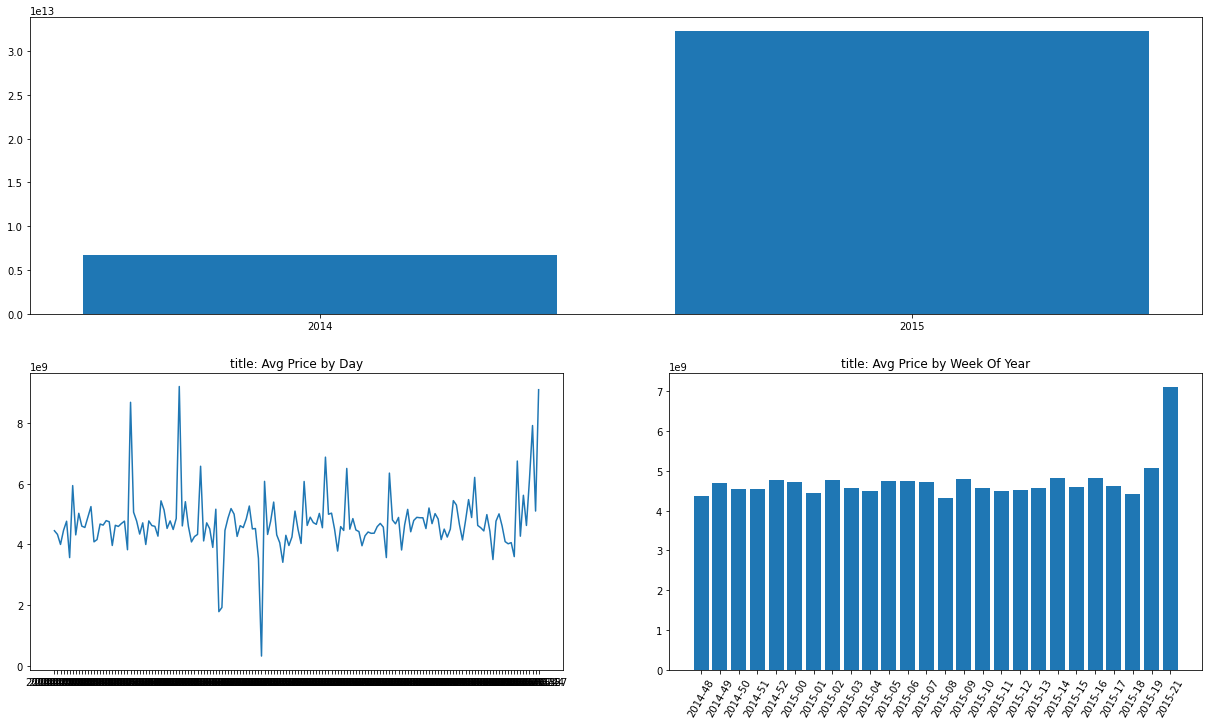

In [76]:
widgets.interactive(update_map, data=fixed(data), limit=date_limit)

# Novas perguntas do CEO para voce

In [ ]:
# 0.1 Qual a média do preço de compra dos imóveis por 'Nível'?
    # Nivel 0: Preço entre R$ 0 e R$ 321.950
    # Nivel 1: Preço entre R$ 321.950 